# Algorytmy ewolucyjne i metaheurystyczne - Heurystyki konstrukcyjne

**Install libs**

!pip install requests
!pip install pandas
!pip install matplotlib
!pip install numpy
!pip install scipy
!pip install sklearn
!pip install pandoc

In [1]:
%reload_ext nb_black

<IPython.core.display.Javascript object>

**Get data url:**

In [2]:
import requests

target_url_kroa100 = "http://elib.zib.de/pub/mp-testdata/tsp/tsplib/tsp/kroA100.tsp"
target_url_krob100 = "http://elib.zib.de/pub/mp-testdata/tsp/tsplib/tsp/kroB100.tsp"


def get_file_from_url(target_url):
    file = requests.get(target_url)
    return file.text

<IPython.core.display.Javascript object>

**Output test:**

In [3]:
data = get_file_from_url(target_url_krob100)
for line in data.split("\n")[6:-2]:
    print(line.split())

['1', '3140', '1401']
['2', '556', '1056']
['3', '3675', '1522']
['4', '1182', '1853']
['5', '3595', '111']
['6', '962', '1895']
['7', '2030', '1186']
['8', '3507', '1851']
['9', '2642', '1269']
['10', '3438', '901']
['11', '3858', '1472']
['12', '2937', '1568']
['13', '376', '1018']
['14', '839', '1355']
['15', '706', '1925']
['16', '749', '920']
['17', '298', '615']
['18', '694', '552']
['19', '387', '190']
['20', '2801', '695']
['21', '3133', '1143']
['22', '1517', '266']
['23', '1538', '224']
['24', '844', '520']
['25', '2639', '1239']
['26', '3123', '217']
['27', '2489', '1520']
['28', '3834', '1827']
['29', '3417', '1808']
['30', '2938', '543']
['31', '71', '1323']
['32', '3245', '1828']
['33', '731', '1741']
['34', '2312', '1270']
['35', '2426', '1851']
['36', '380', '478']
['37', '2310', '635']
['38', '2830', '775']
['39', '3829', '513']
['40', '3684', '445']
['41', '171', '514']
['42', '627', '1261']
['43', '1490', '1123']
['44', '61', '81']
['45', '422', '542']
['46', '2698',

<IPython.core.display.Javascript object>

**Get lat lon from data**

In [4]:
def get_lat_lon_from_url(target_url):
    data = get_file_from_url(target_url)
    list_of_cords = data.split("\n")[6:-2]
    return zip(*[(int(i.split()[1]), int(i.split()[2])) for i in list_of_cords])


<IPython.core.display.Javascript object>

**Calculate matrix**

In [5]:
import pandas as pd
import numpy as np
import math


def calc_matrix(lat, lon):
    matrix_size = len(lat)
    matrix = pd.DataFrame(
        np.nan, index=np.arange(matrix_size), columns=np.arange(matrix_size)
    )
    for row in range(matrix.shape[0]):
        for col in range(row, matrix.shape[1]):
            if row == col:
                matrix.iat[row, col] = np.inf
            else:
                matrix.iat[row, col] = matrix.iat[col, row] = round(
                    math.sqrt(
                        ((lat[col] - lat[row]) ** 2) + ((lon[col] - lon[row]) ** 2)
                    )
                )

    return matrix

<IPython.core.display.Javascript object>

**Display steps dynamically**

In [6]:
import matplotlib.pyplot as plt


def test_display_dynamically(tedis, distance_matrix, lat, lon):
    from IPython.display import clear_output

    for elem in tedis:
        clear_output(wait=True)
        x, y = [], []
        plt.scatter(lat, lon, color="black")
        for i, vertex in enumerate(elem):
            x.append(lat[vertex])
            y.append(lon[vertex])
            plt.scatter(lat[vertex], lon[vertex], color="red", zorder=2)
            plt.annotate(i, (lat[vertex], lon[vertex]))
        plt.scatter(lat[elem[0]], lon[elem[0]], color="green", zorder=2)
        plt.plot(x, y, zorder=1)

        path_length = calculate_path_length(elem, distance_matrix)
        plt.figtext(
            1.02,
            0.5,
            "Path length {path_length}".format(path_length=path_length),
            horizontalalignment="center",
            wrap=True,
            fontsize=10,
            bbox={"facecolor": "grey", "alpha": 0.3, "pad": 5},
        )
        plt.pause(0.02)
    plt.show()
    return True

<IPython.core.display.Javascript object>

In [7]:
def get_combs(current_tsp):
    return [
        [current_tsp[i], current_tsp[i + 1]] for i, d in enumerate(current_tsp[:-1])
    ]


def calculate_path_length(tsp_final_outcome, distance_matrix):
    return sum(
        [distance_matrix.loc[x, y].sum() for (x, y) in get_combs(tsp_final_outcome)]
    )

<IPython.core.display.Javascript object>

**NN Algorithm:**

In [8]:
def get_clossest_points(distance_matrix, idx):
    num = round(0.5 * distance_matrix.shape[0] - 1)
    neigbrs = distance_matrix.nsmallest(num, idx)
    neigbrs_list = list(neigbrs.index)
    return neigbrs_list

<IPython.core.display.Javascript object>

In [9]:
import random


def tsp_nn(distance_matrix, selected_vertex=None):
    if selected_vertex is None:
        selected_vertex = random.randint(0, 99)

    # get rid off the furthest cords
    closest_points = get_clossest_points(distance_matrix, selected_vertex)
    distance_matrix_truncated = distance_matrix.loc[
        closest_points + [selected_vertex], closest_points + [selected_vertex]
    ]

    tsp_outcome = [selected_vertex]
    test_display = [tsp_outcome.copy()]
    for _ in range(distance_matrix_truncated.shape[0] - 1):
        # find minimum in column
        ix_min = int(distance_matrix_truncated[[selected_vertex]].idxmin())
        # push min to outcome
        tsp_outcome.append(ix_min)
        test_display.append(tsp_outcome.copy())
        # set distance to 0
        distance_matrix_truncated = distance_matrix_truncated.drop(
            index=selected_vertex, columns=selected_vertex
        )
        # set vertex as ix_min
        selected_vertex = ix_min

    tsp_outcome.append(tsp_outcome[0])
    test_display[-1].append(test_display[-1][0])
    return tsp_outcome, test_display

<IPython.core.display.Javascript object>

%matplotlib inline

import matplotlib.pyplot as plt
from IPython.display import display, HTML

lat, lon = get_lat_lon_from_url(target_url_kroa100)
distance_matrix = calc_matrix(lat,lon)
tsp, tedis_nn= tsp_nn(distance_matrix, 41)



test_display_dynamically(tedis_nn, distance_matrix, lat, lon)

**NN ALG Run:**

%matplotlib inline

import matplotlib.pyplot as plt
from IPython.display import display, HTML

distance_matrix = calc_matrix(lat,lon)


for i in range(10):
    tsp, ted = tsp_nn(distance_matrix,selected_vertex = i)
    print(len(tsp))

#test_display_dynamically(ted, distance_matrix,nn=True)

**Greedy Cycle Alg**

In [10]:
import pandas as pd
import numpy as np


def get_index_min_value_in_cols(list_of_cols, distance_matrix):
    distance_matrix_truncated = distance_matrix.drop(list(set(list_of_cols)))
    min_value_list = distance_matrix_truncated[list_of_cols].min()
    min_value = min_value_list.min()
    min_value_index_in_list = min_value_list.to_list().index(min_value)
    col_index_in_distance_matrix = list_of_cols[min_value_index_in_list]
    ix_min = int(distance_matrix_truncated[col_index_in_distance_matrix].idxmin())
    return ix_min

<IPython.core.display.Javascript object>

In [11]:
def get_min_length_to_point(point, current_tsp, distance_matrix):
    minimal_points = []
    current_minimal = 1000000000
    for (x, y) in get_combs(current_tsp):
        distance_matrix_truncated = distance_matrix.loc[[point], [x, y]]
        new_length = distance_matrix_truncated.sum().sum()
        x_y_distance = distance_matrix.loc[x, y].sum()
        total_length_increase = new_length - x_y_distance
        if total_length_increase < current_minimal:
            minimal_points = [x, y]
            current_minimal = total_length_increase
    return minimal_points


def insert_after_element(current_tsp, elem, value_to_insert):
    elem_index = current_tsp.index(elem)
    current_tsp.insert(elem_index + 1, value_to_insert)
    return current_tsp

<IPython.core.display.Javascript object>

In [12]:
import random
import numpy as np


def tsp_greedy(distance_matrix, selected_vertex=None):
    if selected_vertex is None:
        selected_vertex = random.randint(0, 99)

    # get rid off the furthest cords
    closest_points = get_clossest_points(distance_matrix, selected_vertex)
    distance_matrix_truncated = distance_matrix.loc[
        closest_points + [selected_vertex], closest_points + [selected_vertex]
    ]

    # find min distannce and connect
    ix_start_min = int(distance_matrix_truncated[[selected_vertex]].idxmin())
    tsp_outcome = [selected_vertex, ix_start_min, selected_vertex]

    test_display = [tsp_outcome.copy()]
    for _ in range(distance_matrix_truncated.shape[0] - 2):

        # find minimum in current tsp outcome
        ix_min = int(
            get_index_min_value_in_cols(tsp_outcome, distance_matrix_truncated)
        )

        # find suitable place to insert elem
        x, y = get_min_length_to_point(ix_min, tsp_outcome, distance_matrix_truncated)

        # push min to outcome
        tsp_outcome = insert_after_element(tsp_outcome, x, ix_min)
        test_display.append(tsp_outcome.copy())

    return tsp_outcome, distance_matrix_truncated, test_display

<IPython.core.display.Javascript object>

%matplotlib inline

import matplotlib.pyplot as plt
from IPython.display import display, HTML

lat, lon = get_lat_lon_from_url(target_url_kroa100)
distance_matrix = calc_matrix(lat,lon)
tsp, d,tedis_greedy= tsp_greedy(distance_matrix, 41)



test_display_dynamically(tedis_greedy, distance_matrix, lat, lon)

**Regret ALG**

In [13]:
def get_cost(point, current_tsp, distance_matrix):
    minimal_points = []
    for (x, y) in get_combs(current_tsp):
        distance_matrix_truncated = distance_matrix.loc[[point], [x, y]]
        new_length = distance_matrix_truncated.sum().sum()
        x_y_distance = distance_matrix.loc[x, y].sum()
        total_cost = new_length - x_y_distance
        minimal_points.append((total_cost, x, y, point))
    # sort
    minimal_points.sort(key=lambda x: x[0])
    # 2 regret
    diff = minimal_points[1][0] - minimal_points[0][0]
    x = minimal_points[0][1]
    y = minimal_points[0][2]
    point = minimal_points[0][3]
    regret = (diff, x, y, point)
    return regret

<IPython.core.display.Javascript object>

In [14]:
def tsp_regret(distance_matrix, selected_vertex=None):
    if selected_vertex is None:
        selected_vertex = random.randint(0, 99)

    # get rid off the furthest cords
    closest_points = get_clossest_points(distance_matrix, selected_vertex)
    distance_matrix_truncated = distance_matrix.loc[
        closest_points + [selected_vertex], closest_points + [selected_vertex]
    ]
    # find min distannce and connect
    ix_start_min = int(distance_matrix_truncated[[selected_vertex]].idxmin())
    tsp_outcome = [selected_vertex, ix_start_min, selected_vertex]

    closest_points.remove(ix_start_min)
    test_display = [tsp_outcome.copy()]
    for _ in range(distance_matrix_truncated.shape[0] - 2):

        regret_scores = []
        for point in closest_points:
            regret_scores.append(get_cost(point, tsp_outcome, distance_matrix))
        regret_scores.sort(key=lambda x: x[0], reverse=True)
        _, x, _, point = regret_scores[0]
        # push min to outcome
        tsp_outcome = insert_after_element(tsp_outcome, x, point)
        test_display.append(tsp_outcome.copy())
        # delete vertex from closest
        closest_points.remove(point)

    return tsp_outcome, distance_matrix_truncated, test_display

<IPython.core.display.Javascript object>

%matplotlib inline

import matplotlib.pyplot as plt
from IPython.display import display, HTML

lat, lon = get_lat_lon_from_url(target_url_kroa100)
distance_matrix = calc_matrix(lat,lon)
tsp, d,tedis_regret= tsp_regret(distance_matrix, 47)



test_display_dynamically(tedis_regret, distance_matrix, lat, lon)

In [15]:
import pandas as pd

p = pd.read_csv("kroa2")
print(p.describe())
nn = p.loc[p["REGRET"].isin([10472])]
print(nn)

       Unnamed: 0            NN        GREEDY        REGRET
count  100.000000    100.000000    100.000000    100.000000
mean    49.500000  13543.940000  13118.050000  11576.230000
std     29.011492    905.257693    584.960611    633.372772
min      0.000000  11431.000000  11838.000000  10472.000000
25%     24.750000  12905.250000  12758.750000  11034.500000
50%     49.500000  13459.500000  13018.500000  11528.000000
75%     74.250000  14036.750000  13666.250000  11962.250000
max     99.000000  16586.000000  14373.000000  13685.000000
    Unnamed: 0       NN   GREEDY   REGRET
47          47  13595.0  12407.0  10472.0


<IPython.core.display.Javascript object>

%matplotlib inline

import matplotlib.pyplot as plt
from IPython.display import display, HTML

distance_matrix = calc_matrix(lat,lon)
tsp,d, te = tsp_regret(distance_matrix)
print(len(tsp))
w = list(set(tsp) - set(d.columns))
print("W",w)
t = list(set([i for i in range(0,100)]) - set(tsp))
print("t",len(t))
#x,y = get_plot_points(tsp, lat, lon)

test_display_dynamically(te)

test_display_dynamically(te)

"""
TEST RUN
"""
import random

def create_comparison_table(target_url, name):    
    lat, lon = get_lat_lon_from_url(target_url)
    distance_matrix = calc_matrix(lat,lon)
    final_scores = []
    
    
    vertexes = [i for i  in range(int(len(lat)))]
#     random.shuffle(vertexes)
    #sample of vertexes
#     vertexes = vertexes[:50]
    
    for vertex in vertexes:
        print(type(vertex), vertex)
        tspnn,_  = tsp_nn(distance_matrix,selected_vertex = vertex)
        tspgreedy,_,_  = tsp_greedy(distance_matrix, selected_vertex =  vertex)
        tspregret,_,_  = tsp_regret(distance_matrix, selected_vertex=vertex)
        scores = [calculate_path_length(tspnn, distance_matrix),calculate_path_length(tspgreedy, distance_matrix),calculate_path_length(tspregret, distance_matrix)]
        final_scores.append(scores.copy())
    df = pd.DataFrame(np.array(final_scores),
                       columns=['NN', 'GREEDY', 'REGRET'],
                        index = vertexes)
    display(df)
    df.to_csv(name, index=True) 


create_comparison_table(target_url=target_url_kroa100, name = "kroa2")
create_comparison_table(target_url=target_url_krob100, name = "krob2")

In [16]:
def create_plot(tsp_outcome, lat, lon, title, distance_matrix):
    plt.cla()
    print(tsp_outcome)
    x, y = [], []
    plt.scatter(lat, lon, color="black")
    for i, vertex in enumerate(tsp_outcome):
        # print(vertex,lat[vertex],lon[vertex])
        x.append(lat[vertex])
        y.append(lon[vertex])
        plt.scatter(lat[vertex], lon[vertex], color="red", zorder=2)
        plt.annotate(i, (lat[vertex], lon[vertex]))
    x.append(x[0])
    y.append(y[0])
    plt.scatter(lat[tsp_outcome[0]], lon[tsp_outcome[0]], color="green", zorder=2)
    plt.plot(x, y, zorder=1)
    print(tsp_outcome)
    path_length = calculate_path_length(tsp_outcome, distance_matrix)
    # plt.figtext(0.0, 1.0, "Path length {path_length}".format(path_length=path_length),horizontalalignment ="center",
    #             wrap = True, fontsize = 10,
    #             bbox ={'facecolor':'grey',
    #                    'alpha':0.3, 'pad':5})

    plt.title(f"{title} \n Długość ścieżki: {path_length}")
    plt.savefig(f"{title}.png", format="png", dpi=1200)

    return x, y

<IPython.core.display.Javascript object>

def test_length_tt():
    lat, lon = get_lat_lon_from_url(target_url_kroa100)
    print(lat[1])
    distance_matrix = calc_matrix(lat,lon)
    tsp,tedis = tsp_nn(distance_matrix, 42)
    print(tsp)
    
    #print(calculate_path_length(tsp[:-1], distance_matrix))
    test_display_dynamically(tedis, distance_matrix, lat, lon)
    #print(calculate_path_length(tsp, distance_matrix))
test_length_tt()

import pandas as pd

def prepare(df, index,title1,target_url):
    l = df['Unnamed: 0'].to_list()
    print(l)
    l.sort()
    print(l)
    lat, lon = get_lat_lon_from_url(target_url)
    distance_matrix = calc_matrix(lat,lon)
    tsp,tedis,_ = tsp_regret(distance_matrix, l[index])
    create_plot(tsp, lat,lon, title1, distance_matrix)
    
# c = pd.read_csv("kroa2", index_col=False)
# display(c)
# print(c.describe())
# nn = c.loc[c['NN'].isin([11431 ,16586 ])]
# prepare(nn, 1,"Wynik dla najkrótszej ścieżki - algorytm najbliższego sąsiada",target_url=target_url_kroa100)
# prepare(nn, 0,"Wynik dla najdłuższej ścieżki - algorytm najbliższego sąsiada",target_url=target_url_kroa100)
# print()
# c = pd.read_csv("kroa", index_col=False)      
# nn = c.loc[c['GREEDY'].isin([11838 ,14373])]
# prepare(nn, 1,"Wynik dla najkrótszej ścieżki - algorytm rozbudowy cyklu",target_url=target_url_kroa100)
# prepare(nn, 0,"Wynik dla najdłuższej ścieżki - algorytm rozbudowy cyklu",target_url=target_url_kroa100)
# print(nn)
# c = pd.read_csv("kroa", index_col=False)
# nn = c.loc[c['REGRET'].isin([10472,13685])]
# prepare(nn, 1,"Wynik dla najkrótszej ścieżki - algorytm oparty na żalu",target_url=target_url_kroa100)
# prepare(nn, 0,"Wynik dla najdłuższej ścieżki - algorytm oparty na żalu",target_url=target_url_kroa100)
# print(nn)


c = pd.read_csv("krob2", index_col=False)
print(c.describe())
# nn = c.loc[c['NN'].isin([10737 ,17955 ])]
# prepare(nn, 0,"Wynik dla najkrótszej ścieżki - algorytm najbliższego sąsiada",target_url=target_url_krob100)
# prepare(nn, 1,"Wynik dla najdłuższej ścieżki - algorytm najbliższego sąsiada",target_url=target_url_krob100)
# print()
# print(nn)

# nn = c.loc[c['GREEDY'].isin([11549,15392])]
# prepare(nn, 1,"Wynik dla najkrótszej ścieżki - algorytm rozbudowy cyklu",target_url=target_url_krob100)
# prepare(nn, 2,"Wynik dla najdłuższej ścieżki - algorytm rozbudowy cyklu",target_url=target_url_krob100)
# print(nn)
# print(nn)
# c = pd.read_csv("krob", index_col=False)
# nn = c.loc[c['REGRET'].isin([9694,14198])]
# prepare(nn, 1,"Wynik dla najkrótszej ścieżki - algorytm oparty na żalu",target_url=target_url_krob100)
# prepare(nn, 2,"Wynik dla najdłuższej ścieżki - algorytm oparty na żalu",target_url=target_url_krob100)
# print(nn)


wewnatrz trasowe
1. losuje kolejnosc wierzcholkow
2. iteruje po wierzcholkach
3. permutacje bez powtorzen wszystkie
3. 

przy wymianie krfawedzi: dodane kraw - wziete kraw < 0

In [17]:
from functools import wraps
from time import time


def timing(f):
    @wraps(f)
    def wrapper(*args, **kwargs):
        start = time()
        start_path, stop_path = f(*args, **kwargs)
        end = time()
        diff = end - start
        print("Elapsed time: {}".format(diff))
        return start_path, stop_path, diff

    return wrapper

<IPython.core.display.Javascript object>

In [18]:
import random


def create_random_vertexes(number_of_samples):
    l = [int(i) for i in range(0, 100)]
    random.shuffle(l)
    vertexes = l[:number_of_samples]
    rest = l[number_of_samples:]
    return vertexes, rest


# print(create_random_vertexes(50))

<IPython.core.display.Javascript object>

In [19]:
def create_combs(neighs):
    import itertools

    return list(itertools.combinations(neighs, 2))


# print(create_perms([1,2,3]))

<IPython.core.display.Javascript object>

In [20]:
def get_neighs(item, path):
    left_neigh = path[path.index(item) - 1]
    right_neigh = (
        path[path.index(item) + 1] if (path.index(item) + 1) < len(path) else path[0]
    )
    return left_neigh, right_neigh


def edge_length(point, neighs, distance_matrix):
    new_length = distance_matrix[point, list(neighs)].sum()
    return new_length


def calculate_edge_swap_cost(swaps, path, distance_matrix):
    (
        swap1,
        swap2,
    ) = swaps
    swap1_neighs = get_neighs(swap1, path)
    swap2_neighs = get_neighs(swap2, path)
    before_cost = edge_length(swap1, swap1_neighs, distance_matrix) + edge_length(
        swap2, swap2_neighs, distance_matrix
    )
    after_cost = edge_length(swap2, swap1_neighs, distance_matrix) + edge_length(
        swap1, swap2_neighs, distance_matrix
    )
    return after_cost - before_cost


def swap_items_in_path(swaps, path):
    swap1, swap2 = swaps
    index1 = path.index(swap1)
    index2 = path.index(swap2)
    path[index1], path[index2] = path[index2], path[index1]

<IPython.core.display.Javascript object>

In [21]:
@timing
def inner_vertex_greedy(path, distance_matrix):
    better = True
    start_path = path.copy()
    print("start", path)
    while better:
        better = False
        possible_moves = create_combs(path)
        random.shuffle(possible_moves)
        for (swap1, swap2) in possible_moves:
            cost = calculate_edge_swap_cost((swap1, swap2), path, distance_matrix)
            if cost < 0:
                swap_items_in_path((swap1, swap2), path)
                better = True
                break
    print("stop", path)
    return start_path, path


path, rest = create_random_vertexes(50)
lat, lon = get_lat_lon_from_url(target_url=target_url_kroa100)
distance_matrix = calc_matrix(lat, lon)
distance_matrix2 = distance_matrix.to_numpy()
start_path, stop_path, diff = inner_vertex_greedy(path, distance_matrix2)

start [54, 85, 32, 29, 94, 55, 45, 67, 20, 56, 90, 37, 18, 1, 62, 7, 74, 22, 30, 10, 27, 9, 65, 48, 91, 95, 41, 87, 75, 43, 79, 96, 21, 60, 47, 0, 58, 81, 8, 51, 38, 69, 82, 77, 26, 12, 61, 36, 4, 11]
stop [82, 8, 67, 75, 32, 38, 26, 85, 61, 22, 90, 9, 37, 48, 74, 18, 21, 87, 69, 65, 96, 55, 30, 79, 41, 1, 81, 94, 12, 43, 10, 58, 20, 62, 91, 7, 0, 27, 60, 56, 11, 45, 47, 51, 4, 36, 95, 77, 29, 54]
Elapsed time: 0.35179924964904785


<IPython.core.display.Javascript object>

[54, 85, 32, 29, 94, 55, 45, 67, 20, 56, 90, 37, 18, 1, 62, 7, 74, 22, 30, 10, 27, 9, 65, 48, 91, 95, 41, 87, 75, 43, 79, 96, 21, 60, 47, 0, 58, 81, 8, 51, 38, 69, 82, 77, 26, 12, 61, 36, 4, 11]
[54, 85, 32, 29, 94, 55, 45, 67, 20, 56, 90, 37, 18, 1, 62, 7, 74, 22, 30, 10, 27, 9, 65, 48, 91, 95, 41, 87, 75, 43, 79, 96, 21, 60, 47, 0, 58, 81, 8, 51, 38, 69, 82, 77, 26, 12, 61, 36, 4, 11]


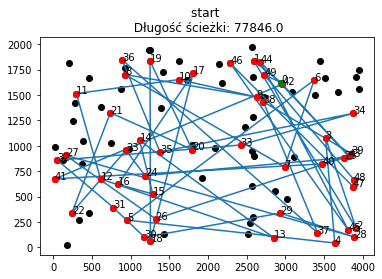

<IPython.core.display.Javascript object>

In [22]:
a = create_plot(start_path, lat, lon, "start", distance_matrix)

[82, 8, 67, 75, 32, 38, 26, 85, 61, 22, 90, 9, 37, 48, 74, 18, 21, 87, 69, 65, 96, 55, 30, 79, 41, 1, 81, 94, 12, 43, 10, 58, 20, 62, 91, 7, 0, 27, 60, 56, 11, 45, 47, 51, 4, 36, 95, 77, 29, 54]
[82, 8, 67, 75, 32, 38, 26, 85, 61, 22, 90, 9, 37, 48, 74, 18, 21, 87, 69, 65, 96, 55, 30, 79, 41, 1, 81, 94, 12, 43, 10, 58, 20, 62, 91, 7, 0, 27, 60, 56, 11, 45, 47, 51, 4, 36, 95, 77, 29, 54]


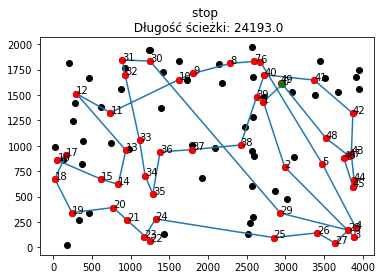

<IPython.core.display.Javascript object>

In [23]:
a = create_plot(stop_path, lat, lon, "stop", distance_matrix)

In [24]:
def find_lowest_cost(possible_moves, path, distance_matrix):
    cost = 99999999999999
    swaps = ()
    for (swap1, swap2) in possible_moves:
        current_cost = calculate_edge_swap_cost((swap1, swap2), path, distance_matrix)
        if current_cost < cost:
            cost = current_cost
            swaps = (swap1, swap2)

    return cost, swaps


@timing
def inner_vertex_steepest(path, distance_matrix):
    better = True
    start_path = path.copy()
    while better:
        better = False
        possible_moves = create_combs(path)
        cost, swaps = find_lowest_cost(possible_moves, path, distance_matrix)
        if cost < 0:
            swap1, swap2 = swaps
            swap_items_in_path((swap1, swap2), path)
            better = True

    return start_path, path


path, rest = create_random_vertexes(50)
lat, lon = get_lat_lon_from_url(target_url=target_url_kroa100)
distance_matrix = calc_matrix(lat, lon)
distance_matrix2 = distance_matrix.to_numpy()
start_path, stop_path, diff = inner_vertex_steepest(path, distance_matrix2)

Elapsed time: 1.800987958908081


<IPython.core.display.Javascript object>

[59, 48, 51, 28, 93, 15, 68, 78, 49, 56, 36, 95, 76, 53, 50, 19, 90, 33, 16, 20, 69, 54, 0, 72, 89, 98, 14, 67, 70, 83, 86, 1, 21, 43, 8, 63, 75, 35, 57, 3, 58, 39, 61, 32, 22, 64, 88, 60, 37, 4]
[59, 48, 51, 28, 93, 15, 68, 78, 49, 56, 36, 95, 76, 53, 50, 19, 90, 33, 16, 20, 69, 54, 0, 72, 89, 98, 14, 67, 70, 83, 86, 1, 21, 43, 8, 63, 75, 35, 57, 3, 58, 39, 61, 32, 22, 64, 88, 60, 37, 4]


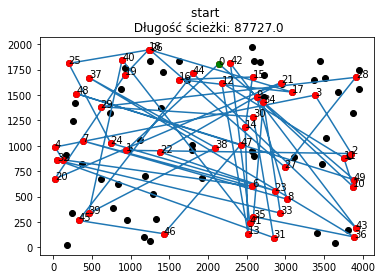

<IPython.core.display.Javascript object>

In [25]:
a = create_plot(start_path, lat, lon, "start", distance_matrix)

[86, 70, 51, 95, 0, 15, 21, 93, 69, 88, 36, 4, 32, 75, 8, 56, 61, 14, 16, 98, 37, 78, 83, 35, 58, 20, 19, 54, 28, 33, 67, 72, 49, 43, 1, 39, 53, 63, 68, 60, 50, 76, 59, 22, 90, 48, 89, 3, 64, 57]
[86, 70, 51, 95, 0, 15, 21, 93, 69, 88, 36, 4, 32, 75, 8, 56, 61, 14, 16, 98, 37, 78, 83, 35, 58, 20, 19, 54, 28, 33, 67, 72, 49, 43, 1, 39, 53, 63, 68, 60, 50, 76, 59, 22, 90, 48, 89, 3, 64, 57]


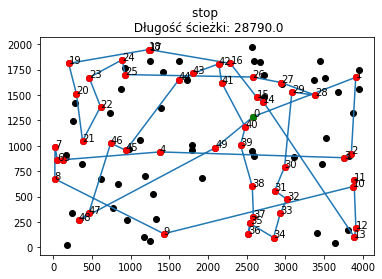

<IPython.core.display.Javascript object>

In [26]:
a = create_plot(stop_path, lat, lon, "stop", distance_matrix)

In [27]:
import itertools
def create_combs_between_two_lists(list1, list2):
    return list(itertools.product(list1, list2))

def calculate_edge_swap_cost_outer(swaps, path, distance_matrix):
    swap1, swap2, = swaps
    neighs = get_neighs(swap1, path)
    before_cost = edge_length(swap1, neighs, distance_matrix)
    after_cost = edge_length(swap2, neighs, distance_matrix)
    return after_cost - before_cost

def swap_item_value_in_list(swaps, path):
    swap1, swap2 = swaps
    index1 = path.index(swap1)
    path[index1]= swap2


<IPython.core.display.Javascript object>

In [28]:
@timing
def outer_vertex_greedy(path, rest, distance_matrix):
    better = True
    start_path = path.copy()
    while better:
        better = False
        possible_moves = create_combs_between_two_lists(path, rest)
        random.shuffle(possible_moves)
        for (swap1, swap2) in possible_moves:
            cost = calculate_edge_swap_cost_outer((swap1, swap2), path, distance_matrix)
            if cost < 0:
                swap_item_value_in_list((swap1, swap2), path)
                swap_item_value_in_list((swap2, swap1), rest)
                better = True
                break
    print("stop", path)
    return start_path, path


path, rest = create_random_vertexes(50)
lat, lon = get_lat_lon_from_url(target_url=target_url_kroa100)
distance_matrix = calc_matrix(lat, lon)
distance_matrix2 = distance_matrix.to_numpy()
start_path, stop_path, diff = outer_vertex_greedy(path, rest, distance_matrix2)

stop [0, 66, 60, 33, 28, 45, 26, 34, 14, 16, 10, 7, 41, 30, 88, 63, 49, 95, 77, 29, 6, 8, 11, 85, 19, 61, 59, 76, 92, 27, 80, 24, 67, 84, 54, 82, 56, 86, 50, 57, 46, 90, 97, 22, 44, 31, 20, 71, 9, 62]
Elapsed time: 0.35002851486206055


<IPython.core.display.Javascript object>

[0, 44, 19, 50, 39, 32, 49, 23, 17, 80, 15, 88, 34, 55, 2, 25, 42, 4, 22, 27, 38, 64, 20, 70, 65, 58, 74, 91, 41, 76, 29, 16, 71, 24, 85, 94, 68, 90, 40, 9, 46, 72, 84, 81, 93, 89, 99, 87, 95, 48]
[0, 44, 19, 50, 39, 32, 49, 23, 17, 80, 15, 88, 34, 55, 2, 25, 42, 4, 22, 27, 38, 64, 20, 70, 65, 58, 74, 91, 41, 76, 29, 16, 71, 24, 85, 94, 68, 90, 40, 9, 46, 72, 84, 81, 93, 89, 99, 87, 95, 48]


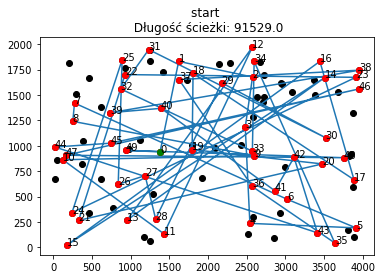

<IPython.core.display.Javascript object>

In [29]:
a = create_plot(start_path, lat, lon, "start", distance_matrix)

[0, 66, 60, 33, 28, 45, 26, 34, 14, 16, 10, 7, 41, 30, 88, 63, 49, 95, 77, 29, 6, 8, 11, 85, 19, 61, 59, 76, 92, 27, 80, 24, 67, 84, 54, 82, 56, 86, 50, 57, 46, 90, 97, 22, 44, 31, 20, 71, 9, 62]
[0, 66, 60, 33, 28, 45, 26, 34, 14, 16, 10, 7, 41, 30, 88, 63, 49, 95, 77, 29, 6, 8, 11, 85, 19, 61, 59, 76, 92, 27, 80, 24, 67, 84, 54, 82, 56, 86, 50, 57, 46, 90, 97, 22, 44, 31, 20, 71, 9, 62]


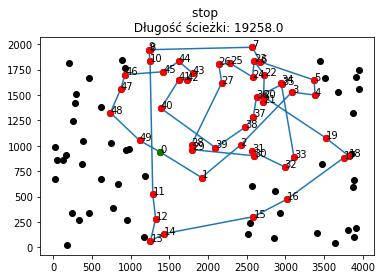

<IPython.core.display.Javascript object>

In [30]:
a = create_plot(stop_path, lat, lon, "stop", distance_matrix)

In [31]:
def edge_length_numpy(point, neighs, distance_matrix):
    new_length = distance_matrix[point, list(neighs)].sum()
    return new_length


def calculate_edge_swap_cost_outer_numpy(swaps, path, distance_matrix):
    (
        swap1,
        swap2,
    ) = swaps
    neighs = get_neighs(swap1, path)
    before_cost = edge_length_numpy(swap1, neighs, distance_matrix)
    after_cost = edge_length_numpy(swap2, neighs, distance_matrix)
    return after_cost - before_cost


def find_lowest_cost(possible_moves, path, distance_matrix):
    cost = 99999999999999
    swaps = ()
    for (swap1, swap2) in possible_moves:
        current_cost = calculate_edge_swap_cost_outer_numpy(
            (swap1, swap2), path, distance_matrix
        )
        if current_cost < cost:
            cost = current_cost
            swaps = (swap1, swap2)

    return cost, swaps


@timing
def outer_vertex_steepest(path, rest, distance_matrix):
    better = True
    start_path = path.copy()
    while better:
        better = False
        possible_moves = create_combs_between_two_lists(path, rest)
        cost, swaps = find_lowest_cost(possible_moves, path, distance_matrix)
        if cost < 0:
            swap1, swap2 = swaps
            swap_item_value_in_list((swap1, swap2), path)
            swap_item_value_in_list((swap2, swap1), rest)
            better = True
    print("stop", path)
    return start_path, path


path, rest = create_random_vertexes(50)
lat, lon = get_lat_lon_from_url(target_url=target_url_kroa100)
distance_matrix = calc_matrix(lat, lon)
distance_matrix2 = distance_matrix.to_numpy()
start_path, stop_path, diff = outer_vertex_steepest(path, rest, distance_matrix2)

stop [71, 9, 18, 74, 59, 61, 19, 76, 22, 46, 7, 91, 27, 44, 58, 14, 90, 97, 31, 92, 66, 62, 0, 83, 23, 17, 78, 89, 56, 6, 11, 34, 85, 26, 54, 8, 86, 50, 57, 5, 48, 68, 72, 24, 80, 60, 20, 73, 16, 10]
Elapsed time: 1.7129216194152832


<IPython.core.display.Javascript object>

[79, 14, 96, 9, 30, 61, 3, 95, 22, 68, 88, 85, 27, 44, 58, 67, 90, 65, 31, 12, 66, 24, 15, 91, 23, 34, 93, 75, 1, 6, 70, 37, 89, 26, 8, 81, 45, 43, 57, 64, 74, 56, 55, 2, 80, 69, 20, 51, 16, 94]
[79, 14, 96, 9, 30, 61, 3, 95, 22, 68, 88, 85, 27, 44, 58, 67, 90, 65, 31, 12, 66, 24, 15, 91, 23, 34, 93, 75, 1, 6, 70, 37, 89, 26, 8, 81, 45, 43, 57, 64, 74, 56, 55, 2, 80, 69, 20, 51, 16, 94]


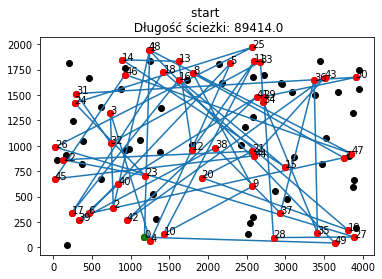

<IPython.core.display.Javascript object>

In [32]:
a = create_plot(start_path, lat, lon, "start", distance_matrix)

[71, 9, 18, 74, 59, 61, 19, 76, 22, 46, 7, 91, 27, 44, 58, 14, 90, 97, 31, 92, 66, 62, 0, 83, 23, 17, 78, 89, 56, 6, 11, 34, 85, 26, 54, 8, 86, 50, 57, 5, 48, 68, 72, 24, 80, 60, 20, 73, 16, 10]
[71, 9, 18, 74, 59, 61, 19, 76, 22, 46, 7, 91, 27, 44, 58, 14, 90, 97, 31, 92, 66, 62, 0, 83, 23, 17, 78, 89, 56, 6, 11, 34, 85, 26, 54, 8, 86, 50, 57, 5, 48, 68, 72, 24, 80, 60, 20, 73, 16, 10]


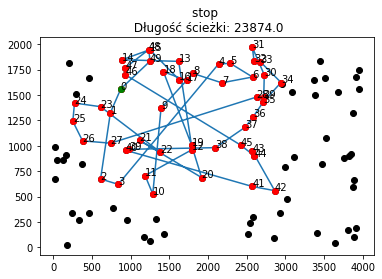

<IPython.core.display.Javascript object>

In [33]:
a = create_plot(stop_path, lat, lon, "stop", distance_matrix)

In [34]:
%reload_ext nb_black


def edge_length_numpy(point, neigh, distance_matrix):
    new_length = distance_matrix[point, neigh].sum()
    return new_length


def get_edges(path):
    return [[path[d - 1], vertex] for d, vertex in enumerate(path)]


def get_edges_except(path):
    e = get_edges(path)
    return [
        item
        for item in itertools.combinations(e, 2)
        if len(set(itertools.chain(*item))) == 4
    ]


# print(get_edges([1,2,3]))


def swap_items_in_path(swaps, path):
    swap1, swap2 = swaps
    index1 = path.index(swap1)
    index2 = path.index(swap2)
    path[index1], path[index2] = path[index2], path[index1]


def reverse_part_of_list(swap1, swap2, path):
    index_swap1 = path.index(swap1)
    index_swap2 = path.index(swap2)
    ix_min = index_swap1 if index_swap1 < index_swap2 else index_swap2
    ix_max = index_swap1 if index_swap1 > index_swap2 else index_swap2
    path[int(ix_min + 1) : ix_max] = path[int(ix_min + 1) : ix_max][::-1]


def calculate_cost_edge_greedy(edge1, edge2, distance_matrix):
    swap1_0 = edge1[0]
    swap1_1 = edge1[1]
    swap2_0 = edge2[0]
    swap2_1 = edge2[1]
    edge1_length = edge_length_numpy(swap1_0, swap1_1, distance_matrix)
    edge2_length = edge_length_numpy(swap2_0, swap2_1, distance_matrix)
    new_edge1_length = edge_length_numpy(swap1_0, swap2_0, distance_matrix)
    new_edge2_length = edge_length_numpy(swap1_1, swap2_1, distance_matrix)
    cost = new_edge1_length + new_edge2_length - edge1_length - edge2_length
    return cost, swap1_1, swap2_0


@timing
def inner_edge_greedy(path, distance_matrix):
    better = True
    start_path = path.copy()
    print("start", path)
    while better:
        better = False
        edges = get_edges_except(path)
        random.shuffle(edges)
        for (edge1, edge2) in edges:
            cost, swap1_1, swap2_0 = calculate_cost_edge_greedy(
                edge1, edge2, distance_matrix
            )

            if cost < 0:
                swap_items_in_path((swap1_1, swap2_0), path)
                reverse_part_of_list(swap1_1, swap2_0, path)
                better = True
                break

    print("stop", path)
    return start_path, path


path, rest = create_random_vertexes(50)
lat, lon = get_lat_lon_from_url(target_url=target_url_kroa100)
distance_matrix = calc_matrix(lat, lon)
distance_matrix2 = distance_matrix.to_numpy()
start_path, stop_path, diff = inner_edge_greedy(path, distance_matrix2)

start [52, 23, 20, 37, 55, 57, 77, 84, 30, 2, 9, 98, 81, 36, 6, 32, 68, 26, 17, 74, 14, 82, 67, 58, 69, 89, 43, 7, 28, 91, 29, 94, 96, 45, 1, 39, 97, 54, 18, 35, 66, 50, 80, 70, 38, 90, 83, 87, 21, 60]
stop [80, 67, 84, 38, 81, 94, 32, 36, 77, 29, 70, 2, 45, 28, 82, 54, 26, 6, 50, 97, 90, 14, 58, 20, 83, 35, 98, 37, 23, 17, 21, 69, 87, 52, 9, 89, 91, 7, 74, 18, 96, 55, 30, 39, 1, 43, 68, 66, 57, 60]
Elapsed time: 0.23887252807617188


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

[52, 23, 20, 37, 55, 57, 77, 84, 30, 2, 9, 98, 81, 36, 6, 32, 68, 26, 17, 74, 14, 82, 67, 58, 69, 89, 43, 7, 28, 91, 29, 94, 96, 45, 1, 39, 97, 54, 18, 35, 66, 50, 80, 70, 38, 90, 83, 87, 21, 60]
[52, 23, 20, 37, 55, 57, 77, 84, 30, 2, 9, 98, 81, 36, 6, 32, 68, 26, 17, 74, 14, 82, 67, 58, 69, 89, 43, 7, 28, 91, 29, 94, 96, 45, 1, 39, 97, 54, 18, 35, 66, 50, 80, 70, 38, 90, 83, 87, 21, 60]


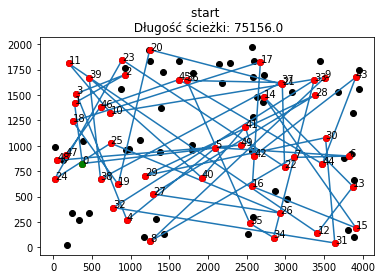

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [35]:
a = create_plot(start_path, lat, lon, "start", distance_matrix)

[80, 67, 84, 38, 81, 94, 32, 36, 77, 29, 70, 2, 45, 28, 82, 54, 26, 6, 50, 97, 90, 14, 58, 20, 83, 35, 98, 37, 23, 17, 21, 69, 87, 52, 9, 89, 91, 7, 74, 18, 96, 55, 30, 39, 1, 43, 68, 66, 57, 60]
[80, 67, 84, 38, 81, 94, 32, 36, 77, 29, 70, 2, 45, 28, 82, 54, 26, 6, 50, 97, 90, 14, 58, 20, 83, 35, 98, 37, 23, 17, 21, 69, 87, 52, 9, 89, 91, 7, 74, 18, 96, 55, 30, 39, 1, 43, 68, 66, 57, 60]


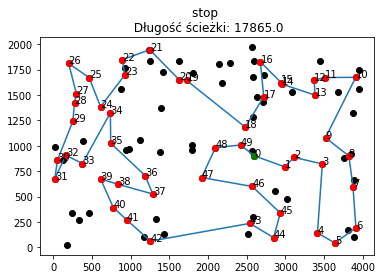

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [36]:
a = create_plot(stop_path, lat, lon, "stop", distance_matrix)

In [37]:
%reload_ext nb_black


def find_lowest_cost_edge(edges, path, distance_matrix):
    cost = 99999999999999
    swaps = ()
    for (edge1, edge2) in edges:
        current_cost, swap1_1, swap2_0 = calculate_cost_edge_greedy(
            edge1, edge2, distance_matrix
        )
        if current_cost < cost:
            cost = current_cost
            swaps = (swap1_1, swap2_0)

    return cost, swaps


@timing
def inner_edge_steepest(path, distance_matrix):
    better = True
    start_path = path.copy()
    while better:
        better = False
        edges = get_edges_except(path)
        cost, (swap1_1, swap2_0) = find_lowest_cost_edge(edges, path, distance_matrix)
        if cost < 0:
            swap_items_in_path((swap1_1, swap2_0), path)
            reverse_part_of_list(swap1_1, swap2_0, path)
            better = True

    return start_path, path


path, rest = create_random_vertexes(50)
lat, lon = get_lat_lon_from_url(target_url=target_url_kroa100)
distance_matrix = calc_matrix(lat, lon)
distance_matrix2 = distance_matrix.to_numpy()
start_path, stop_path, diff = inner_edge_steepest(path, distance_matrix2)

Elapsed time: 0.6716995239257812


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

[5, 31, 86, 25, 37, 57, 99, 69, 94, 41, 27, 92, 52, 33, 46, 90, 14, 48, 50, 34, 64, 17, 77, 30, 51, 63, 1, 87, 89, 19, 58, 72, 7, 6, 76, 10, 80, 53, 21, 2, 85, 39, 61, 22, 67, 83, 36, 38, 9, 82]
[5, 31, 86, 25, 37, 57, 99, 69, 94, 41, 27, 92, 52, 33, 46, 90, 14, 48, 50, 34, 64, 17, 77, 30, 51, 63, 1, 87, 89, 19, 58, 72, 7, 6, 76, 10, 80, 53, 21, 2, 85, 39, 61, 22, 67, 83, 36, 38, 9, 82]


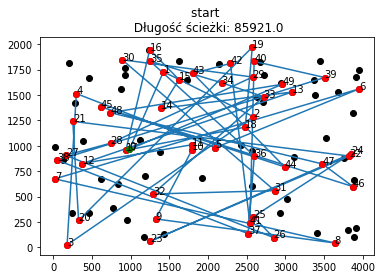

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [38]:
a = create_plot(start_path, lat, lon, "start", distance_matrix)

[19, 85, 34, 61, 22, 31, 10, 14, 58, 37, 17, 83, 9, 89, 52, 87, 21, 69, 25, 64, 48, 5, 46, 90, 76, 6, 86, 50, 67, 72, 80, 57, 92, 27, 7, 41, 30, 53, 39, 63, 1, 94, 36, 38, 77, 51, 99, 2, 33, 82]
[19, 85, 34, 61, 22, 31, 10, 14, 58, 37, 17, 83, 9, 89, 52, 87, 21, 69, 25, 64, 48, 5, 46, 90, 76, 6, 86, 50, 67, 72, 80, 57, 92, 27, 7, 41, 30, 53, 39, 63, 1, 94, 36, 38, 77, 51, 99, 2, 33, 82]


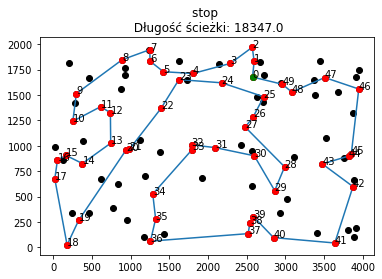

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [39]:
a = create_plot(stop_path, lat, lon, "stop", distance_matrix)

In [40]:
@timing
def hehe(num):
    for _ in range(num):
        pass
    return [1, 2]


hehe(100000)

Elapsed time: 0.0019991397857666016


(1, 2, 0.0019991397857666016)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [41]:
# inner_and_outer_vertex_greedy greedy
@timing
def inner_and_outer_vertex_greedy(path, rest, distance_matrix):
    better = True
    start_path = path.copy()
    while better:
        better = False
        choice = random.getrandbits(1)

        if choice == 0:
            # inner
            possible_moves = create_combs(path)
            random.shuffle(possible_moves)
            for (swap1, swap2) in possible_moves:
                cost = calculate_edge_swap_cost((swap1, swap2), path, distance_matrix)
                if cost < 0:
                    swap_items_in_path((swap1, swap2), path)
                    better = True
                    break
        if choice == 1:
            # outer
            possible_moves = create_combs_between_two_lists(path, rest)
            random.shuffle(possible_moves)
            for (swap1, swap2) in possible_moves:
                cost = calculate_edge_swap_cost_outer(
                    (swap1, swap2), path, distance_matrix
                )
                if cost < 0:
                    swap_item_value_in_list((swap1, swap2), path)
                    swap_item_value_in_list((swap2, swap1), rest)
                    better = True
                    break
    return start_path, path


path, rest = create_random_vertexes(50)
lat, lon = get_lat_lon_from_url(target_url=target_url_kroa100)
distance_matrix = calc_matrix(lat, lon)
distance_matrix2 = distance_matrix.to_numpy()
start_path, stop_path, diff = inner_and_outer_vertex_greedy(
    path, rest, distance_matrix2
)

Elapsed time: 0.31282687187194824


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

[44, 9, 6, 91, 73, 72, 19, 70, 43, 10, 1, 94, 52, 97, 40, 98, 69, 28, 3, 90, 5, 93, 67, 27, 56, 42, 37, 65, 79, 36, 33, 63, 77, 39, 64, 45, 95, 41, 25, 26, 99, 74, 55, 15, 82, 51, 84, 61, 66, 87]
[44, 9, 6, 91, 73, 72, 19, 70, 43, 10, 1, 94, 52, 97, 40, 98, 69, 28, 3, 90, 5, 93, 67, 27, 56, 42, 37, 65, 79, 36, 33, 63, 77, 39, 64, 45, 95, 41, 25, 26, 99, 74, 55, 15, 82, 51, 84, 61, 66, 87]


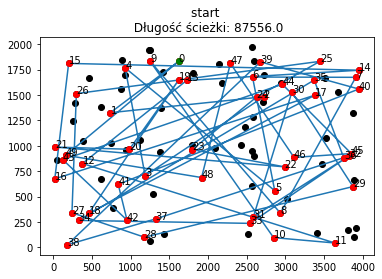

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [42]:
a = create_plot(start_path, lat, lon, "start", distance_matrix)

[85, 56, 6, 8, 50, 86, 24, 68, 43, 1, 49, 72, 60, 46, 5, 48, 18, 15, 21, 69, 3, 96, 55, 89, 71, 20, 10, 44, 2, 70, 40, 99, 47, 95, 84, 66, 7, 91, 62, 0, 92, 27, 41, 88, 39, 63, 67, 54, 82, 19]
[85, 56, 6, 8, 50, 86, 24, 68, 43, 1, 49, 72, 60, 46, 5, 48, 18, 15, 21, 69, 3, 96, 55, 89, 71, 20, 10, 44, 2, 70, 40, 99, 47, 95, 84, 66, 7, 91, 62, 0, 92, 27, 41, 88, 39, 63, 67, 54, 82, 19]


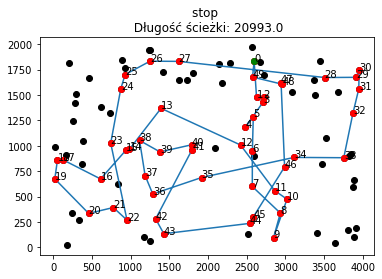

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [43]:
a = create_plot(stop_path, lat, lon, "stop", distance_matrix)

In [44]:
# inner_and_outer_vertex_steepest steepest
@timing
def inner_and_outer_vertex_steepest(path, rest, distance_matrix):
    better = True
    start_path = path.copy()
    while better:
        better = False
        choice = random.getrandbits(1)

        if choice == 0:
            possible_moves = create_combs(path)
            cost, swaps = find_lowest_cost(possible_moves, path, distance_matrix)
            if cost < 0:
                swap1, swap2 = swaps
                swap_items_in_path((swap1, swap2), path)
                better = True
        if choice == 1:
            possible_moves = create_combs_between_two_lists(path, rest)
            cost, swaps = find_lowest_cost(possible_moves, path, distance_matrix)
            if cost < 0:
                swap1, swap2 = swaps
                swap_item_value_in_list((swap1, swap2), path)
                swap_item_value_in_list((swap2, swap1), rest)
                better = True

    return start_path, path


path, rest = create_random_vertexes(50)
lat, lon = get_lat_lon_from_url(target_url=target_url_kroa100)
distance_matrix = calc_matrix(lat, lon)
distance_matrix2 = distance_matrix.to_numpy()
start_path, stop_path, diff = inner_and_outer_vertex_steepest(
    path, rest, distance_matrix2
)

Elapsed time: 3.8112730979919434


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

[20, 12, 97, 96, 33, 8, 16, 70, 24, 62, 1, 40, 72, 51, 5, 63, 45, 82, 32, 34, 56, 7, 38, 60, 83, 43, 22, 0, 37, 52, 98, 73, 86, 55, 76, 50, 2, 21, 36, 19, 39, 90, 11, 44, 68, 41, 26, 89, 80, 99]
[20, 12, 97, 96, 33, 8, 16, 70, 24, 62, 1, 40, 72, 51, 5, 63, 45, 82, 32, 34, 56, 7, 38, 60, 83, 43, 22, 0, 37, 52, 98, 73, 86, 55, 76, 50, 2, 21, 36, 19, 39, 90, 11, 44, 68, 41, 26, 89, 80, 99]


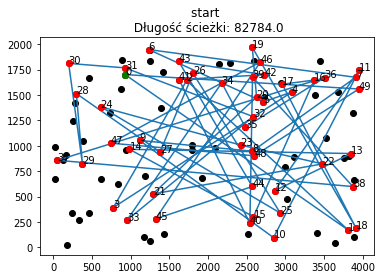

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [45]:
a = create_plot(start_path, lat, lon, "start", distance_matrix)

[27, 92, 59, 61, 56, 86, 24, 80, 72, 43, 49, 38, 95, 77, 51, 29, 33, 82, 6, 8, 19, 85, 26, 76, 90, 31, 20, 73, 58, 10, 44, 22, 97, 11, 54, 84, 67, 68, 63, 39, 88, 30, 79, 41, 7, 91, 5, 62, 0, 66]
[27, 92, 59, 61, 56, 86, 24, 80, 72, 43, 49, 38, 95, 77, 51, 29, 33, 82, 6, 8, 19, 85, 26, 76, 90, 31, 20, 73, 58, 10, 44, 22, 97, 11, 54, 84, 67, 68, 63, 39, 88, 30, 79, 41, 7, 91, 5, 62, 0, 66]


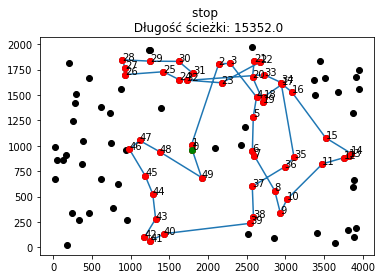

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [46]:
a = create_plot(stop_path, lat, lon, "stop", distance_matrix)

In [47]:
# outer vertex inner edge
@timing
def outer_vertex_inner_edge_greedy(path, rest, distance_matrix):
    better = True
    start_path = path.copy()
    while better:
        better = False
        choice = random.getrandbits(1)

        if choice == 0:
            possible_moves = create_combs_between_two_lists(path, rest)
            random.shuffle(possible_moves)
            for (swap1, swap2) in possible_moves:
                cost = calculate_edge_swap_cost_outer(
                    (swap1, swap2), path, distance_matrix
                )
                if cost < 0:
                    swap_item_value_in_list((swap1, swap2), path)
                    swap_item_value_in_list((swap2, swap1), rest)
                    better = True
                    break
        if choice == 1:
            edges = get_edges_except(path)
            random.shuffle(edges)
            for (edge1, edge2) in edges:
                cost, swap1_1, swap2_0 = calculate_cost_edge_greedy(
                    edge1, edge2, distance_matrix
                )

                if cost < 0:
                    swap_items_in_path((swap1_1, swap2_0), path)
                    reverse_part_of_list(swap1_1, swap2_0, path)
                    better = True
                    break
    return start_path, path


path, rest = create_random_vertexes(50)
lat, lon = get_lat_lon_from_url(target_url=target_url_kroa100)
distance_matrix = calc_matrix(lat, lon)
distance_matrix2 = distance_matrix.to_numpy()
start_path, stop_path, diff = outer_vertex_inner_edge_greedy(
    path, rest, distance_matrix2
)

Elapsed time: 0.39377331733703613


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

[28, 63, 70, 20, 10, 12, 93, 81, 36, 62, 86, 64, 23, 87, 96, 32, 43, 61, 24, 41, 51, 39, 92, 83, 72, 59, 22, 8, 34, 29, 17, 97, 47, 35, 37, 2, 94, 85, 9, 21, 46, 88, 58, 44, 82, 67, 31, 79, 57, 49]
[28, 63, 70, 20, 10, 12, 93, 81, 36, 62, 86, 64, 23, 87, 96, 32, 43, 61, 24, 41, 51, 39, 92, 83, 72, 59, 22, 8, 34, 29, 17, 97, 47, 35, 37, 2, 94, 85, 9, 21, 46, 88, 58, 44, 82, 67, 31, 79, 57, 49]


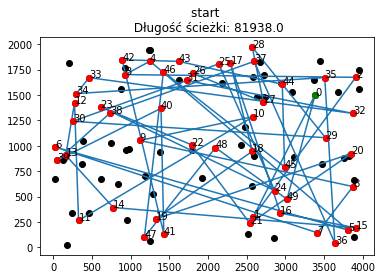

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [48]:
a = create_plot(start_path, lat, lon, "start", distance_matrix)

[57, 60, 24, 80, 67, 84, 13, 70, 40, 2, 45, 28, 33, 82, 54, 11, 6, 8, 86, 50, 56, 85, 26, 19, 61, 59, 44, 14, 16, 58, 35, 23, 17, 15, 87, 78, 83, 71, 20, 10, 31, 90, 97, 22, 46, 0, 7, 91, 92, 27]
[57, 60, 24, 80, 67, 84, 13, 70, 40, 2, 45, 28, 33, 82, 54, 11, 6, 8, 86, 50, 56, 85, 26, 19, 61, 59, 44, 14, 16, 58, 35, 23, 17, 15, 87, 78, 83, 71, 20, 10, 31, 90, 97, 22, 46, 0, 7, 91, 92, 27]


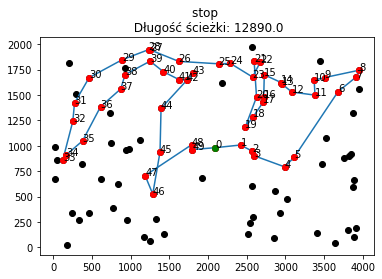

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [49]:
a = create_plot(stop_path, lat, lon, "stop", distance_matrix)

In [50]:
# outer vertex inner edge
@timing
def outer_vertex_inner_edge_steepest(path, rest, distance_matrix):
    better = True
    start_path = path.copy()
    while better:
        better = False
        choice = random.getrandbits(1)

        if choice == 0:
            possible_moves = create_combs_between_two_lists(path, rest)
            cost, swaps = find_lowest_cost(possible_moves, path, distance_matrix)
            if cost < 0:
                swap1, swap2 = swaps
                swap_item_value_in_list((swap1, swap2), path)
                swap_item_value_in_list((swap2, swap1), rest)
                better = True

        if choice == 1:
            edges = get_edges_except(path)
            cost, (swap1_1, swap2_0) = find_lowest_cost_edge(
                edges, path, distance_matrix
            )
            if cost < 0:
                swap_items_in_path((swap1_1, swap2_0), path)
                reverse_part_of_list(swap1_1, swap2_0, path)
                better = True
    return start_path, path


path, rest = create_random_vertexes(50)
lat, lon = get_lat_lon_from_url(target_url=target_url_kroa100)
distance_matrix = calc_matrix(lat, lon)
distance_matrix2 = distance_matrix.to_numpy()
start_path, stop_path, diff = outer_vertex_inner_edge_steepest(
    path, rest, distance_matrix2
)
print("s", start_path)
print()
print("s2", stop_path)
print()
print("diff", diff)

Elapsed time: 1.6116631031036377
s [57, 38, 19, 25, 6, 32, 4, 89, 45, 0, 22, 12, 83, 9, 49, 75, 71, 50, 69, 93, 54, 26, 68, 48, 20, 39, 73, 81, 66, 90, 60, 62, 15, 44, 17, 97, 7, 36, 40, 5, 96, 24, 64, 82, 8, 42, 23, 27, 59, 94]

s2 [81, 1, 39, 63, 68, 80, 24, 60, 57, 66, 27, 92, 0, 62, 5, 48, 89, 52, 87, 15, 21, 93, 78, 83, 9, 71, 90, 97, 22, 59, 61, 85, 26, 11, 6, 8, 54, 82, 33, 45, 2, 28, 29, 95, 4, 36, 32, 75, 12, 94]

diff 1.6116631031036377


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

[57, 38, 19, 25, 6, 32, 4, 89, 45, 0, 22, 12, 83, 9, 49, 75, 71, 50, 69, 93, 54, 26, 68, 48, 20, 39, 73, 81, 66, 90, 60, 62, 15, 44, 17, 97, 7, 36, 40, 5, 96, 24, 64, 82, 8, 42, 23, 27, 59, 94]
[57, 38, 19, 25, 6, 32, 4, 89, 45, 0, 22, 12, 83, 9, 49, 75, 71, 50, 69, 93, 54, 26, 68, 48, 20, 39, 73, 81, 66, 90, 60, 62, 15, 44, 17, 97, 7, 36, 40, 5, 96, 24, 64, 82, 8, 42, 23, 27, 59, 94]


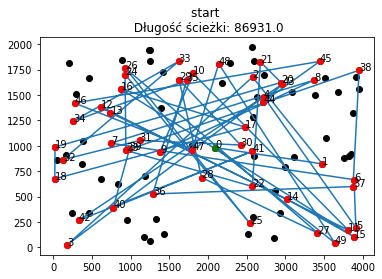

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [51]:
a = create_plot(start_path, lat, lon, "start", distance_matrix)

[81, 1, 39, 63, 68, 80, 24, 60, 57, 66, 27, 92, 0, 62, 5, 48, 89, 52, 87, 15, 21, 93, 78, 83, 9, 71, 90, 97, 22, 59, 61, 85, 26, 11, 6, 8, 54, 82, 33, 45, 2, 28, 29, 95, 4, 36, 32, 75, 12, 94]
[81, 1, 39, 63, 68, 80, 24, 60, 57, 66, 27, 92, 0, 62, 5, 48, 89, 52, 87, 15, 21, 93, 78, 83, 9, 71, 90, 97, 22, 59, 61, 85, 26, 11, 6, 8, 54, 82, 33, 45, 2, 28, 29, 95, 4, 36, 32, 75, 12, 94]


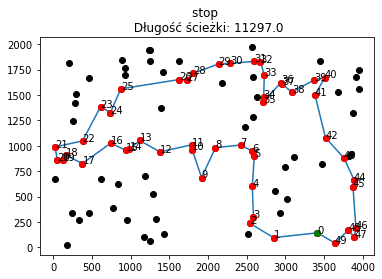

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [52]:
a = create_plot(stop_path, lat, lon, "stop", distance_matrix)

In [53]:
# test function

# create set of 100 paths
paths = []
for _ in range(200):
    path, _ = create_random_vertexes(50)
    if path not in paths:
        paths.append(path)

with open("paths.txt", "w") as file:
    for line in paths[:100]:
        file.write(" ".join([str(i) for i in line]))
        file.write("\n")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [56]:
with open("paths.txt", "r") as file:
    data = file.readlines()


def test(program):
    final_scores = []

    for items in data:
        path = [int(item) for item in items.split()]
        rest = list(set([i for i in range(100)]) - set(path))
        lat, lon = get_lat_lon_from_url(target_url=target_url_kroa100)
        distance_matrix = calc_matrix(lat, lon)
        distance_matrix2 = distance_matrix.to_numpy()
        start_path, stop_path, diff = program(path, rest, distance_matrix2)
        path_len = calculate_path_length(stop_path + [stop_path[0]], distance_matrix)
        scores = [diff, path_len]
        final_scores.append(scores)
    df = pd.DataFrame(np.array(final_scores), columns=["Time", "Path"])
    display(df)
    display(df.describe())
    return True


test(outer_vertex_inner_edge_steepest)

Elapsed time: 1.4292948246002197
Elapsed time: 2.2293541431427
Elapsed time: 1.9757773876190186
Elapsed time: 1.4864485263824463
Elapsed time: 2.49308180809021
Elapsed time: 2.250734567642212
Elapsed time: 1.9828810691833496
Elapsed time: 1.7589871883392334
Elapsed time: 2.2765285968780518
Elapsed time: 2.351351261138916


,Time,Path
0,1.429295,13111.0
1,2.229354,11650.0
2,1.975777,12502.0
3,1.486449,14590.0
4,2.493082,12683.0
5,2.250735,12242.0
6,1.982881,12911.0
7,1.758987,13646.0
8,2.276529,12136.0
9,2.351351,13283.0


,Time,Path
count,10.000000,10.000000
mean,2.023444,12875.400000
std,0.365365,842.123533
min,1.429295,11650.000000
25%,1.813185,12307.000000
50%,2.106118,12797.000000
75%,2.270080,13240.000000
max,2.493082,14590.000000


True

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
def prin(txt):
    print(txt)


def f(program):
    program("hehe")


f(prin)